In [1]:
import requests
import datetime
import pathlib
import apimoex
import os
import sys
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_data = []
board = 'TQBR'
with open(r'C:\Users\79020\Desktop\Forecasting\Tks.txt') as TICKs:
    TICKs = [line.rstrip() for line in TICKs]
pathlib.Path(r'C:\Users\79020\Desktop\Forecasting/{}'.format(board)).mkdir(parents=True, exist_ok=True)
process = 0
with requests.Session() as session:
    for TICK in TICKs:
         process = process + 1
         print((process / len(TICKs)) * 100, ' %')
         data = apimoex.get_board_candles(session, TICK, 24, board=board)
         if data == []:
             continue
         data = [{'TICK':TICK, **x} for x in data]
         full_data = [*full_data, *data]
         df = pd.DataFrame(full_data)

0.37593984962406013  %
0.7518796992481203  %
1.1278195488721803  %
1.5037593984962405  %
1.8796992481203008  %
2.2556390977443606  %
2.631578947368421  %
3.007518796992481  %
3.3834586466165413  %
3.7593984962406015  %
4.135338345864661  %
4.511278195488721  %
4.887218045112782  %
5.263157894736842  %
5.639097744360902  %
6.015037593984962  %
6.390977443609022  %
6.7669172932330826  %
7.142857142857142  %
7.518796992481203  %
7.894736842105263  %
8.270676691729323  %
8.646616541353383  %
9.022556390977442  %
9.398496240601503  %
9.774436090225564  %
10.150375939849624  %
10.526315789473683  %
10.902255639097744  %
11.278195488721805  %
11.654135338345863  %
12.030075187969924  %
12.406015037593985  %
12.781954887218044  %
13.157894736842104  %
13.533834586466165  %
13.909774436090224  %
14.285714285714285  %
14.661654135338345  %
15.037593984962406  %
15.413533834586465  %
15.789473684210526  %
16.165413533834585  %
16.541353383458645  %
16.917293233082706  %
17.293233082706767  %
17.6

In [4]:
df

,TICK,begin,open,close,high,low,value
0,CBOM,2015-07-01 00:00:00,3.6270,3.6800,3.740,3.6240,7.991831e+07
1,CBOM,2015-07-02 00:00:00,3.8000,3.6455,3.800,3.6240,1.008043e+08
2,CBOM,2015-07-03 00:00:00,3.7250,3.6370,3.725,3.6315,1.391775e+08
3,CBOM,2015-07-06 00:00:00,3.6405,3.6700,3.670,3.6400,3.069886e+07
4,CBOM,2015-07-07 00:00:00,3.8000,3.6310,3.800,3.6310,1.108124e+08
...,...,...,...,...,...,...,...
476045,ARSA,2022-12-07 00:00:00,5.3400,5.3000,5.360,5.2800,2.132380e+05
476046,ARSA,2022-12-08 00:00:00,5.3000,5.3400,5.340,5.2600,3.490900e+04
476047,ARSA,2022-12-09 00:00:00,5.3400,5.3000,5.340,5.2800,7.150200e+04
476048,ARSA,2022-12-12 00:00:00,5.3000,5.3200,5.330,5.2900,6.916200e+04


In [41]:
need = df[(df['begin']< "2019-05-01") & (df['begin']>= "2018-06-01") & (df['TICK']=='SBER')]
need = need[['TICK', 'begin', 'close']]
need

,TICK,begin,close
94615,SBER,2018-06-01 00:00:00,220.00
94616,SBER,2018-06-04 00:00:00,220.00
94617,SBER,2018-06-05 00:00:00,215.56
94618,SBER,2018-06-06 00:00:00,217.90
94619,SBER,2018-06-07 00:00:00,216.41
...,...,...,...
94843,SBER,2019-04-24 00:00:00,236.00
94844,SBER,2019-04-25 00:00:00,227.80
94845,SBER,2019-04-26 00:00:00,223.18
94846,SBER,2019-04-29 00:00:00,228.80


<AxesSubplot:>

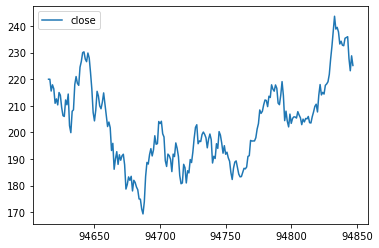

In [42]:
need.plot()

In [55]:
need.sort_values(by = ['TICK','begin'], inplace = True)
need['prev_close'] = need.shift(1)['close']
#дропнуть первую строку и выходные 
need = need.dropna()
need = need[(need['prev_close']!= need['close'])] 
need['raise'] = need['close']/need['prev_close']
need['log_raise'] = np.log(need['close']/need['prev_close'])
need['log_raise_sign'] = np.sign(np.log(need['close']/need['prev_close']))

#дропнуть первую строку и выходные
need['Cumulative log_raise_sign sum'] = need['log_raise_sign'].cumsum()
need


C:\Users\79020\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\79020\AppData\Local\Temp/ipykernel_8892/3890608524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  need['prev_close'] = need.shift(1)['close']


,TICK,begin,close,prev_close,log_raise,raise,log_raise_sign,Cumulative log_raise_sign sum
94617,SBER,2018-06-05 00:00:00,215.56,220.00,-0.020388,0.979818,-1.0,-1.0
94618,SBER,2018-06-06 00:00:00,217.90,215.56,0.010797,1.010855,1.0,0.0
94619,SBER,2018-06-07 00:00:00,216.41,217.90,-0.006861,0.993162,-1.0,-1.0
94620,SBER,2018-06-08 00:00:00,210.95,216.41,-0.025554,0.974770,-1.0,-2.0
94621,SBER,2018-06-09 00:00:00,212.60,210.95,0.007791,1.007822,1.0,-1.0
...,...,...,...,...,...,...,...,...
94843,SBER,2019-04-24 00:00:00,236.00,235.67,0.001399,1.001400,1.0,-4.0
94844,SBER,2019-04-25 00:00:00,227.80,236.00,-0.035364,0.965254,-1.0,-5.0
94845,SBER,2019-04-26 00:00:00,223.18,227.80,-0.020489,0.979719,-1.0,-6.0
94846,SBER,2019-04-29 00:00:00,228.80,223.18,0.024870,1.025181,1.0,-5.0


<AxesSubplot:xlabel='begin'>

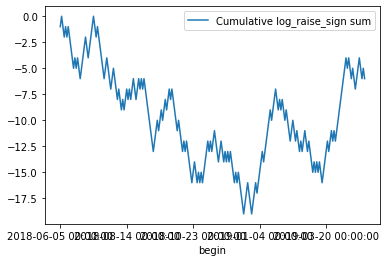

In [56]:
ax = plt.gca()
need.plot( x = 'begin' , y = 'Cumulative log_raise_sign sum', ax = ax )